In [69]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rakshu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\abcnews-date-text.csv.zip.csv",encoding="ISO-8859-1")
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
199994,20051111,g g attends illawarra remembrance day
199995,20051111,glory on top of knights
199996,20051111,gm canola contamination report released
199997,20051111,governments work towards charlestown masterplan


In [71]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\abcnews-date-text.csv.zip.csv",encoding="ISO-8859-1",parse_dates=['publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   publish_date   199999 non-null  datetime64[ns]
 1   headline_text  199999 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ MB


In [72]:
#import re
import pandas as pd
from nltk.corpus import stopwords

# the data is already in lower case without any punctuation, otherwise we would have to code for the same

df=pd.read_csv(r"C:\Users\Rakshu\Downloads\abcnews-date-text.csv.zip.csv",encoding="ISO-8859-1",parse_dates=['publish_date'])

# but our data does have some stopwords ("the", "a", "an")

df["new_headline"]=df["headline_text"]
stop=stopwords.words('english')

df["new_headline"]=df["new_headline"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df

,publish_date,headline_text,new_headline
0,2003-02-19,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,2003-02-19,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation
2,2003-02-19,a g calls for infrastructure protection summit,g calls infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,2003-02-19,air nz strike to affect australian travellers,air nz strike affect australian travellers
...,...,...,...
199994,2005-11-11,g g attends illawarra remembrance day,g g attends illawarra remembrance day
199995,2005-11-11,glory on top of knights,glory top knights
199996,2005-11-11,gm canola contamination report released,gm canola contamination report released
199997,2005-11-11,governments work towards charlestown masterplan,governments work towards charlestown masterplan


In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia=SIA()
results=[]
for headline in df['new_headline']:
    pol_score=sia.polarity_scores(headline)
    pol_score['headline']=headline
    results.append(pol_score)

In [74]:
df['score']=pd.DataFrame(results)['compound']
df.head()

,publish_date,headline_text,new_headline,score
0,2003-02-19,aba decides against community broadcasting lic...,aba decides community broadcasting licence,0.0000
1,2003-02-19,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,-0.3400
2,2003-02-19,a g calls for infrastructure protection summit,g calls infrastructure protection summit,0.0000
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,-0.2263
4,2003-02-19,air nz strike to affect australian travellers,air nz strike affect australian travellers,-0.1280


In [75]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['classification']=df['score'].apply(analysis)

df.head(10)

,publish_date,headline_text,new_headline,score,classification
0,2003-02-19,aba decides against community broadcasting lic...,aba decides community broadcasting licence,0.0000,Neutral
1,2003-02-19,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,-0.3400,Negative
2,2003-02-19,a g calls for infrastructure protection summit,g calls infrastructure protection summit,0.0000,Neutral
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,-0.2263,Negative
4,2003-02-19,air nz strike to affect australian travellers,air nz strike affect australian travellers,-0.1280,Negative
5,2003-02-19,ambitious olsson wins triple jump,ambitious olsson wins triple jump,0.7783,Positive
6,2003-02-19,antic delighted with record breaking barca,antic delighted record breaking barca,0.5106,Positive
7,2003-02-19,aussie qualifier stosur wastes four memphis match,aussie qualifier stosur wastes four memphis match,0.0000,Neutral
8,2003-02-19,aust addresses un security council over iraq,aust addresses un security council iraq,0.3400,Positive
9,2003-02-19,australia is locked into war timetable opp,australia locked war timetable opp,-0.5994,Negative


In [76]:
tb_counts = df.classification.value_counts()

tb_counts

Neutral     80264
Negative    73021
Positive    46714
Name: classification, dtype: int64

([<matplotlib.patches.Wedge at 0x17ab2f63ca0>,
 [Text(0.33557084552619093, 1.0475648942346423, 'Neutral'),
  Text(-0.9507491129735034, -0.5532414700472991, 'Negative'),
  Text(1.0025702766968185, -0.9040756828297423, 'Positive')],
 [Text(0.18303864301428596, 0.5713990332188957, '40.1%'),
  Text(-0.5185904252582746, -0.30176807457125404, '36.5%'),
  Text(0.6312479519942932, -0.5692328373372451, '23.4%')])

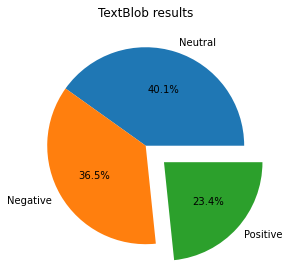

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
# now we implement lemmatization (removes grammar tense and transforms each word to original)

import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])

def space(text):
    doc=nlp(text)
    return " ".join([token.lemma_ for token in doc])

df["new_headline"]=df["new_headline"].apply(space)
df